In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/environmental-sensor-data-132k/iot_telemetry_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data Set and Basic Data Exploration

In this part I load dataset with pandas library and do some basic exploration to the dataset. In There we have found that dataset has 405184 rows and 8 columns. There are following columns in the dataset:
          
          1. ts (timestamp) ==> epoch
          2. device id ==> object
          3. CO (Carbon Monoxide) in ppm ==> float64
          4. humidity in percent ==> float64
          5. light ==> bool
          6. LPG (liquified Petroleum Gas) in ppm ==> float64
          7. motion ==> bool
          8. smoke in ppm ==> float64
          9. Temperature in Fahrenheit ==> float64
          
There are no missing value in this datasset. 

In [3]:
path = '../input/environmental-sensor-data-132k/iot_telemetry_data.csv'
dataIot = pd.read_csv(path, index_col='ts')
dataIot.head()

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [4]:
dataIot.shape

(405184, 8)

In [5]:
dataIot.describe()

,co,humidity,lpg,smoke,temp
count,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,0.004639,60.511694,0.007237,0.019264,22.453987
std,0.001250,11.366489,0.001444,0.004086,2.698347
min,0.001171,1.100000,0.002693,0.006692,0.000000
25%,0.003919,51.000000,0.006456,0.017024,19.900000
50%,0.004812,54.900000,0.007489,0.019950,22.200000
75%,0.005409,74.300003,0.008150,0.021838,23.600000
max,0.014420,99.900002,0.016567,0.046590,30.600000


In [6]:
dataIot.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 405184 entries, 1594512094.3859746 to 1595203417.2643125
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   device    405184 non-null  object 
 1   co        405184 non-null  float64
 2   humidity  405184 non-null  float64
 3   light     405184 non-null  bool   
 4   lpg       405184 non-null  float64
 5   motion    405184 non-null  bool   
 6   smoke     405184 non-null  float64
 7   temp      405184 non-null  float64
dtypes: bool(2), float64(5), object(1)
memory usage: 22.4+ MB


In [7]:
dataIot.isnull().sum()

device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

# Data Preprocessing

Before I am analyzing data in to more detail, I do some preprocessing to make data ready for more detail analysis. I remove **motion** column because its only contains False value and I assume it can't help to predict result we want. Then I encode a label for some columns. There are **device** and **light** columns. It's because the data in device column represent environment condtion that we want to predict. There are the following data on device and the label to represent it.

        1. 00:0f:00:70:91:0a (stable conditions, cooler and more humid) ==> 0
        2. 1c:bf:ce:15:ec:4d (highly variable temperature and humidity) ==> 1
        3. b8:27:eb:bf:9d:51 (stable conditions, warmer and dryer) ==> 2

And for the light column I represent the absence of light by label 0 (False) and 1 (True). It is because data on the light column has boolean data type.

In [8]:
data = dataIot.copy()
data = data.drop(['motion'], axis = 1)
data.head()

,device,co,humidity,light,lpg,smoke,temp
ts,,,,,,,
1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,0.020411,22.700000
1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,0.013275,19.700001
1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,0.020475,22.600000
1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,0.018628,27.000000
1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,0.020448,22.600000


In [9]:
from sklearn.preprocessing import LabelEncoder

encLab = LabelEncoder()
deviceEnc = pd.DataFrame(encLab.fit_transform(data['device']), columns=['condition'])
deviceEnc.index = data.index

dataEnc = pd.concat([data, deviceEnc], axis=1)
dataEnc.head()

,device,co,humidity,light,lpg,smoke,temp,condition
ts,,,,,,,,
1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,0.020411,22.700000,2
1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,0.013275,19.700001,0
1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,0.020475,22.600000,2
1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,0.018628,27.000000,1
1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,0.020448,22.600000,2


In [10]:
encLab2 = LabelEncoder()
lightEnc = pd.DataFrame(encLab2.fit_transform(dataEnc['light']), columns=['lights'])
lightEnc.index = dataEnc.index

dataEnc2 = pd.concat([dataEnc, lightEnc], axis=1)
dataEnc2.head()

,device,co,humidity,light,lpg,smoke,temp,condition,lights
ts,,,,,,,,,
1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,0.020411,22.700000,2,0
1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,0.013275,19.700001,0,0
1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,0.020475,22.600000,2,0
1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,0.018628,27.000000,1,1
1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,0.020448,22.600000,2,0


In [11]:
dataProcessed = dataEnc2.drop(['device', 'light'], axis=1)
dataProcessed.head()

,co,humidity,lpg,smoke,temp,condition,lights
ts,,,,,,,
1.594512e+09,0.004956,51.000000,0.007651,0.020411,22.700000,2,0
1.594512e+09,0.002840,76.000000,0.005114,0.013275,19.700001,0,0
1.594512e+09,0.004976,50.900000,0.007673,0.020475,22.600000,2,0
1.594512e+09,0.004403,76.800003,0.007023,0.018628,27.000000,1,1
1.594512e+09,0.004967,50.900000,0.007664,0.020448,22.600000,2,0


# Exploratory Data Analysis

## Univariate Analysis

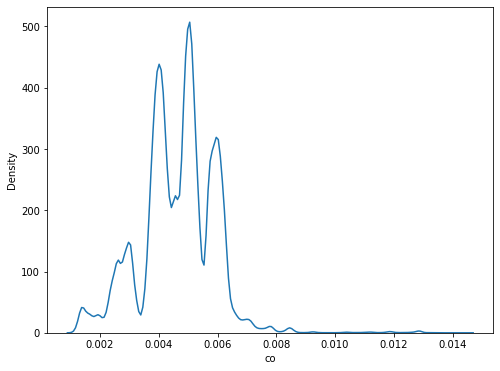

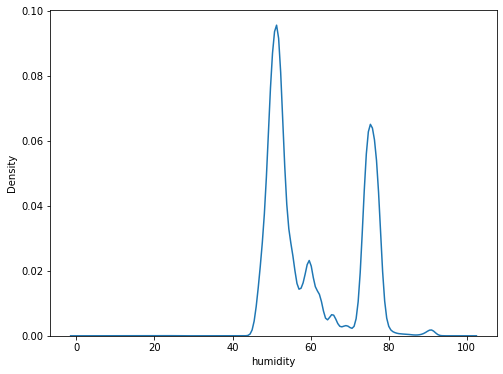

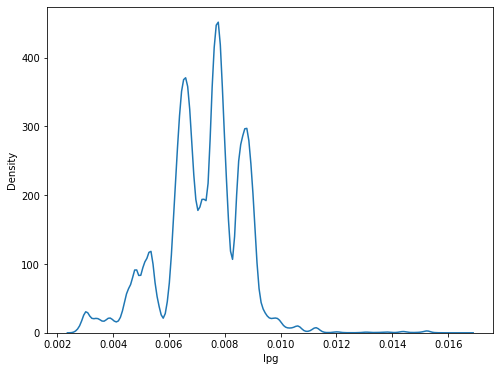

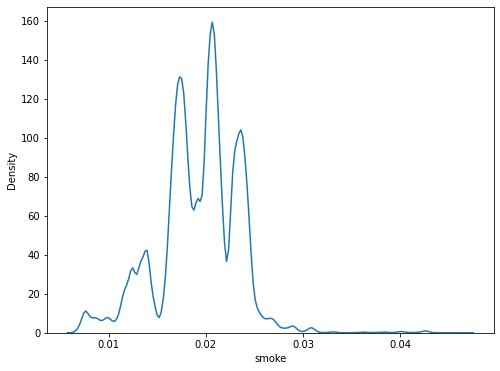

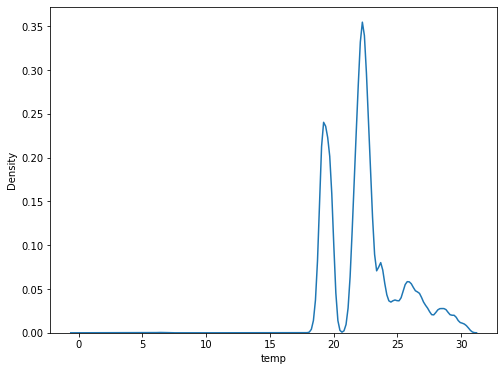

In [12]:
for i in dataProcessed.columns:
    if dataProcessed[i].nunique() > 5:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(x=i, data=dataProcessed)
        plt.show()

In [13]:
def barplot(columnname):
    val = dataProcessed[columnname]
    valCount = val.value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(valCount.index, valCount)
    plt.title(columnname)
    plt.ylabel('Frequency')
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


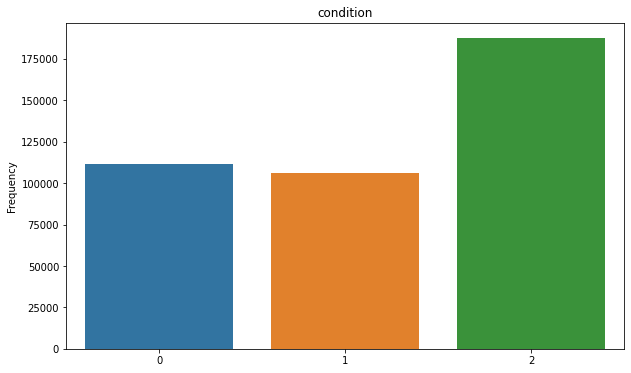

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


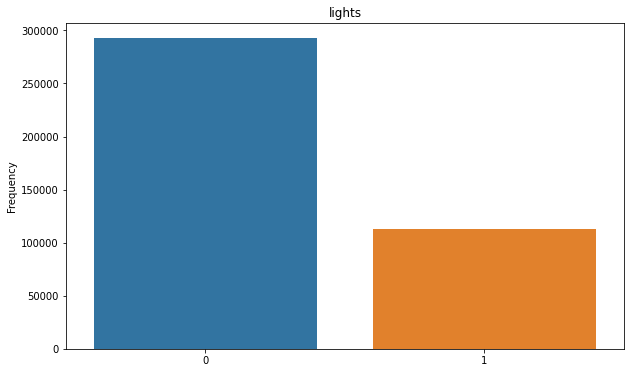

In [14]:
for i in dataProcessed.columns:
    if dataProcessed[i].nunique() <= 5:
        barplot(i)

## Multivariate Analysis

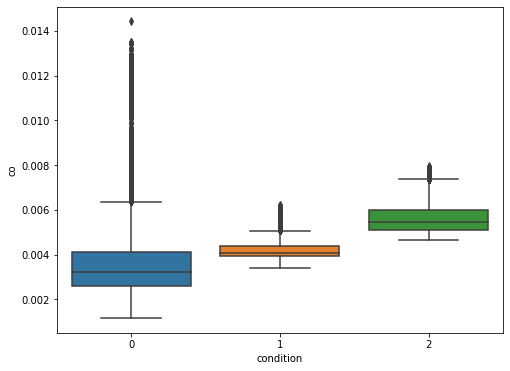

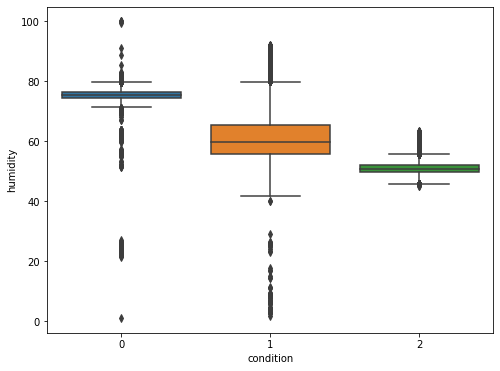

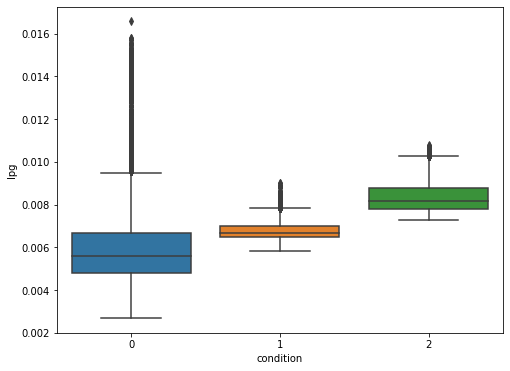

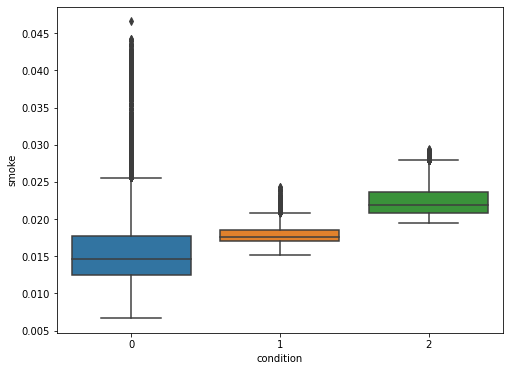

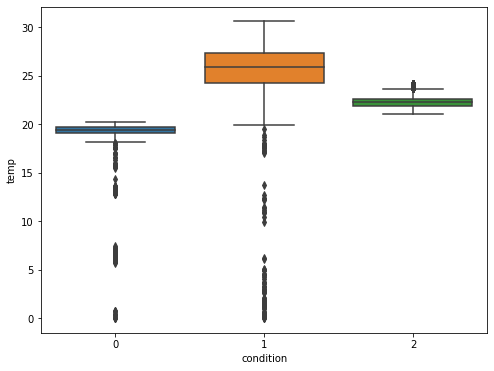

In [15]:
for k in dataProcessed.columns:
    if dataProcessed[k].nunique() > 5:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=dataProcessed['condition'], y=dataProcessed[k])
        plt.show()
        

<AxesSubplot:>

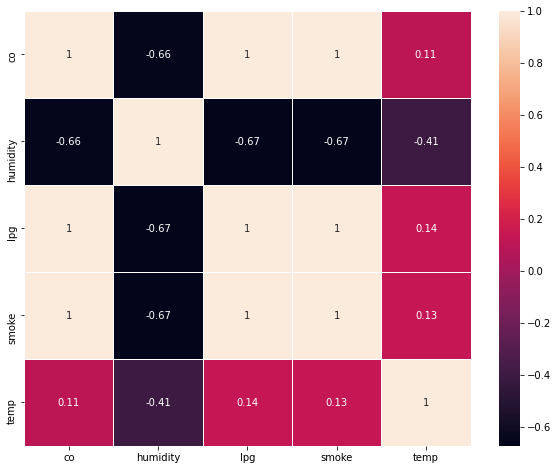

In [16]:
dataCorr = dataProcessed.drop(['lights', 'condition'], axis=1)
corr = dataCorr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=.5)

## Data Cleaning

 I am removed some columns that high correlation coefficient. Also, I delete outliers in numerical data in dataset. Then, I standardize the value of cleaned using standard scaler form scikit learn. 

In [17]:
dataCleanInput = dataProcessed.copy()
removedCol = ['lpg', 'smoke', 'co']

dataCleaned = dataCleanInput.drop(removedCol, axis=1)
dataCleaned.head()

,humidity,temp,condition,lights
ts,,,,
1.594512e+09,51.000000,22.700000,2,0
1.594512e+09,76.000000,19.700001,0,0
1.594512e+09,50.900000,22.600000,2,0
1.594512e+09,76.800003,27.000000,1,1
1.594512e+09,50.900000,22.600000,2,0


In [18]:
Q1 = dataCleaned.quantile(.25)
Q3 = dataCleaned.quantile(.75)
IQR = Q3-Q1
dataClean = dataCleaned[~((dataCleaned<(Q1-1.5*IQR))|(dataCleaned>(Q3+1.5*IQR))).any(axis=1)]
dataClean.head()

,humidity,temp,condition,lights
ts,,,,
1.594512e+09,51.000000,22.700000,2,0
1.594512e+09,76.000000,19.700001,0,0
1.594512e+09,50.900000,22.600000,2,0
1.594512e+09,76.800003,27.000000,1,1
1.594512e+09,50.900000,22.600000,2,0


In [19]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
humidScaled =pd.DataFrame(scaler1.fit_transform(dataClean[['humidity']]), columns=['humid'])
humidScaled.index = dataClean.index
dataClean1 = pd.concat([dataClean, humidScaled], axis=1)
dataClean1.head()

,humidity,temp,condition,lights,humid
ts,,,,,
1.594512e+09,51.000000,22.700000,2,0,-0.839883
1.594512e+09,76.000000,19.700001,0,0,1.346868
1.594512e+09,50.900000,22.600000,2,0,-0.848630
1.594512e+09,76.800003,27.000000,1,1,1.416844
1.594512e+09,50.900000,22.600000,2,0,-0.848630


In [20]:
scaler2 = StandardScaler()
tempScaled =pd.DataFrame(scaler1.fit_transform(dataClean[['temp']]), columns=['temperature'])
tempScaled.index = dataClean1.index
dataClean2 = pd.concat([dataClean1, tempScaled], axis=1)
dataClean2.head()

,humidity,temp,condition,lights,humid,temperature
ts,,,,,,
1.594512e+09,51.000000,22.700000,2,0,-0.839883,0.157192
1.594512e+09,76.000000,19.700001,0,0,1.346868,-1.057423
1.594512e+09,50.900000,22.600000,2,0,-0.848630,0.116705
1.594512e+09,76.800003,27.000000,1,1,1.416844,1.898141
1.594512e+09,50.900000,22.600000,2,0,-0.848630,0.116705


In [21]:
y = dataClean2['condition']
X = dataClean2[['temp', 'humid', 'lights']]
X

,temp,humid,lights
ts,,,
1.594512e+09,22.700000,-0.839883,0
1.594512e+09,19.700001,1.346868,0
1.594512e+09,22.600000,-0.848630,0
1.594512e+09,27.000000,1.416844,1
1.594512e+09,22.600000,-0.848630,0
...,...,...,...
1.595203e+09,19.200001,1.285639,0
1.595203e+09,22.200000,-1.058558,0
1.595203e+09,26.600000,1.320627,1


## Data Splitting

First, I split whole dataset into two parts there are training dataset and test dataset with the proportion training (80%) and test (20%). After that, I do split the training dataset into two parts : training data (80%) and validation data (20%). 

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)


In [23]:
xTrain, xVal, yTrain, yVal = train_test_split(x_train, y_train,test_size=0.2, random_state=0 )

## Machine Learning Modelling

In this section I make baseline model to know what optimal what appropriate the model to classify environment condition and optimum hyperparameter. I try to solve the problem with Random Forest Classifier. Baseline model itself trained with training dataset and verify with validation dataset. Then, I evaluate the baseline model and model with confusion matrix, precision and recall.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state=0, max_depth=1)
model.fit(xTrain, yTrain)
predResult = model.predict(xVal)
report = classification_report(yVal, predResult)
confMat = confusion_matrix(yVal, predResult)
print(report)
print(confMat)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17765
           1       1.00      0.87      0.93     15616
           2       0.94      1.00      0.97     30064

    accuracy                           0.97     63445
   macro avg       0.98      0.96      0.97     63445
weighted avg       0.97      0.97      0.97     63445

[[17751     0    14]
 [    3 13653  1960]
 [    0     0 30064]]


In [26]:
model = RandomForestClassifier(random_state=0, max_depth=1)
model.fit(x_train, y_train)
prediction = model.predict(x_train)
reports = classification_report(y_train, prediction)
conf = confusion_matrix(y_train, prediction)
print(reports)
print(conf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89416
           1       1.00      0.87      0.93     77874
           2       0.94      1.00      0.97    149932

    accuracy                           0.97    317222
   macro avg       0.98      0.96      0.97    317222
weighted avg       0.97      0.97      0.97    317222

[[ 89358      0     58]
 [    19  67873   9982]
 [     0      0 149932]]


## Discussion 

From the analysis above we know some features can be removed to gain better performance classifier. These removed features are co, lpg and smoke. It is because these features have high correlation coefficient among them. Hence, we can build a model only with humidity, temperature and lights features. 